<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [734]:
import pandas as pd

In [735]:
data_info = pd.read_csv(r'C:\Users\Sergi\Desktop\Data_Science\22-Deep Learning\TensorFlow_FILES\DATA/lending_club_info.csv', index_col='LoanStatNew')

In [736]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [737]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [738]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [739]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [740]:
df = pd.read_csv(r'C:\Users\Sergi\Desktop\Data_Science\22-Deep Learning\TensorFlow_FILES\DATA\lending_club_loan_two.csv')

In [741]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Project Tasks

**Complete the tasks below! Keep in mind is usually more than one way to complete the task! Enjoy**

-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

<AxesSubplot: xlabel='loan_status', ylabel='count'>

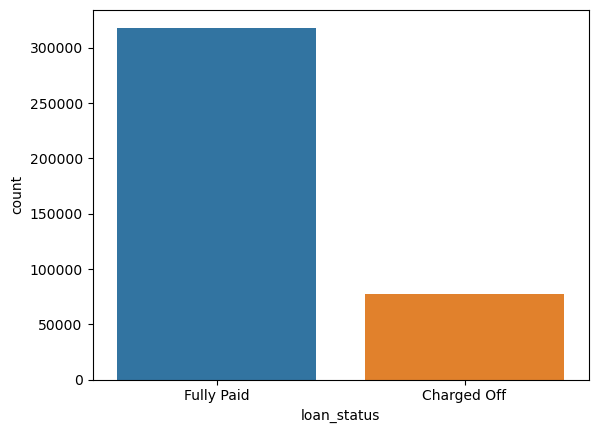

In [742]:
sns.countplot(x='loan_status', data=df) 

# This is an unbalanced or imbalanced problem. We have a lot more entries of people that fully pay off their loans.
# This is common for things like classification problems that have to do with fraud or spam.
# There's a lot less instances of fraud or spam than there are of legitimate actions, such as a legitimate
# email or a legitimate credit card purchase or a legitimate loan where it was fully paid off.

# This means we can expect to probably do very well in terms of accuracy, but our precision
# and recall are going to be the true metrics that will have to evaluate our model based off of.
# And we shouldn't expect to perform that well on those particular metrics due to the fact that we have a
# very imbalanced data set here.

**TASK: Create a histogram of the loan_amnt column.**

<AxesSubplot: xlabel='loan_amnt', ylabel='Count'>

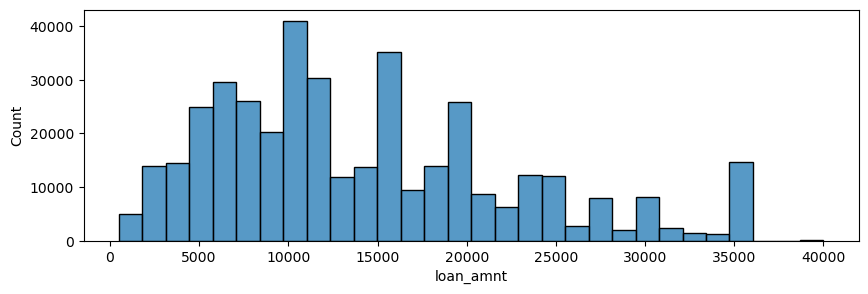

In [743]:
plt.figure(figsize=(10,3))
sns.histplot(x='loan_amnt', data=df, bins=30)

# these little spikes are essentially indicating that there are certain amounts 
# that are basically standard loans (10k, 15k, 20k).

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [744]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

<AxesSubplot: >

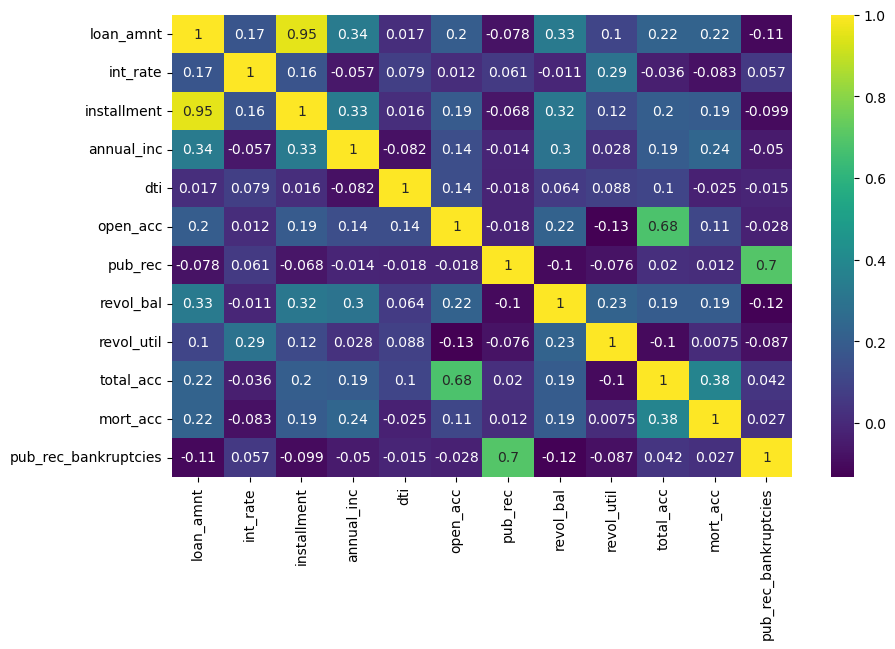

In [745]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap ='viridis', annot=True)

**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

In [746]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [747]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot: xlabel='installment', ylabel='loan_amnt'>

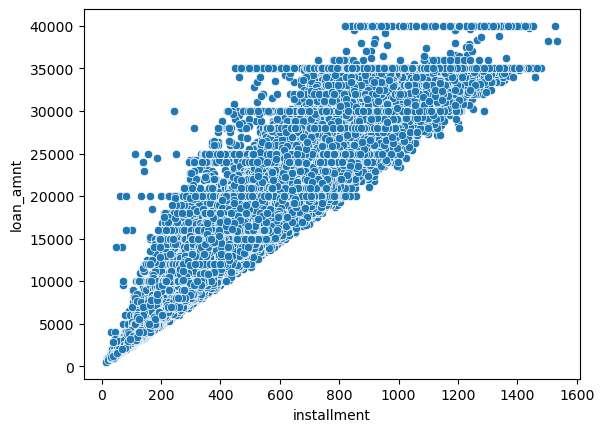

In [748]:
# We always want to make sure that there's not a single feature that is a perfect predictor of the
# label, because that basically indicates that it's not really a feature.
# It's probably just some duplicate information that's very similar to the label.

sns.scatterplot(x='installment',y='loan_amnt',data=df)

**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

<AxesSubplot: xlabel='loan_status', ylabel='loan_amnt'>

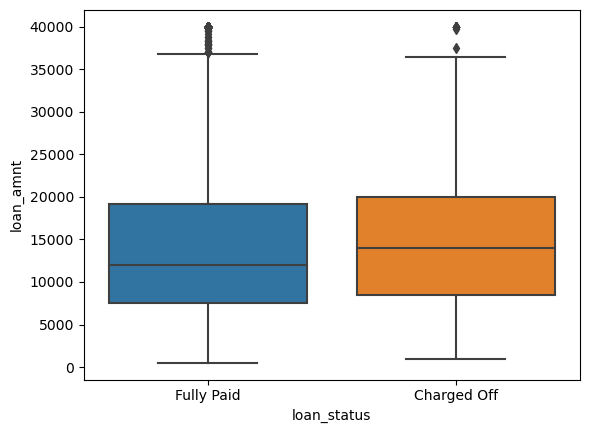

In [749]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

# Charged off loans on average is slightly higher, meaning that if our loan amount is higher, we have a
# slight increase in the likelihood of it being charged off, which again intuitively makes sense that
# it's harder to pay back larger loans than it is smaller loans.

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [750]:
df.groupby('loan_status')['loan_amnt'].describe()

# Here is indicating the averages of the loans for people that aren't able to pay them
# back are slightly higher than the averages for people that do pay off their loans. That is also indicated in the last boxplot.

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [751]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [752]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

<AxesSubplot: xlabel='grade', ylabel='count'>

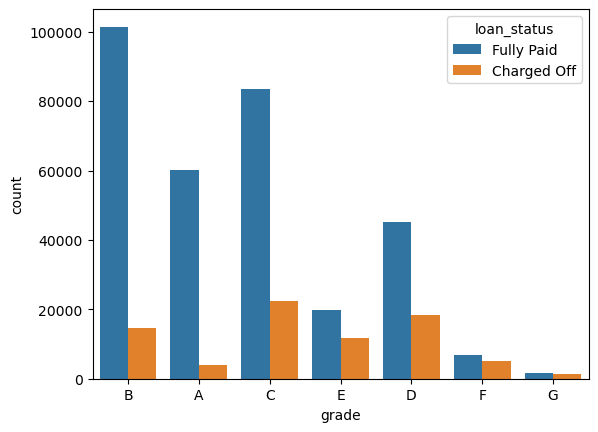

In [753]:
sns.countplot(x='grade', hue='loan_status', data=df)

#  We can see if there is differentiation between fully paying off your loan or having it be charged off based off your grade.

# The percentage of Charged Off loans looks like it's increasing as the letter grade gets higher.
# So it looks like the best customers are given a grade of A, the second best given a grade of B, C.


**TASK: Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"**

<AxesSubplot: xlabel='sub_grade', ylabel='count'>

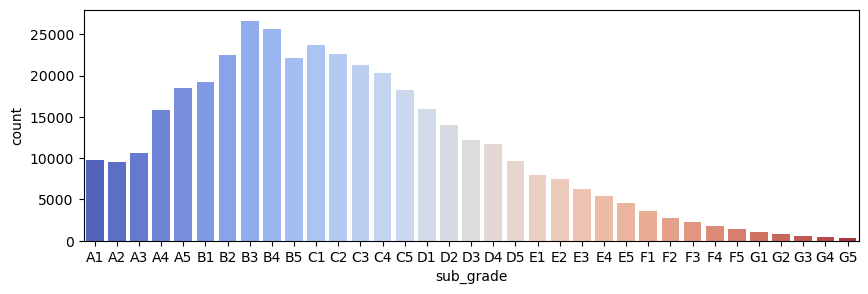

In [754]:
plt.figure(figsize=(10,3))
sns.countplot(x='sub_grade', data=df, palette='coolwarm', order=sorted(df['sub_grade'].unique()))

# Can see here the better grades are bluer and the worse grades are redder

<AxesSubplot: xlabel='sub_grade', ylabel='count'>

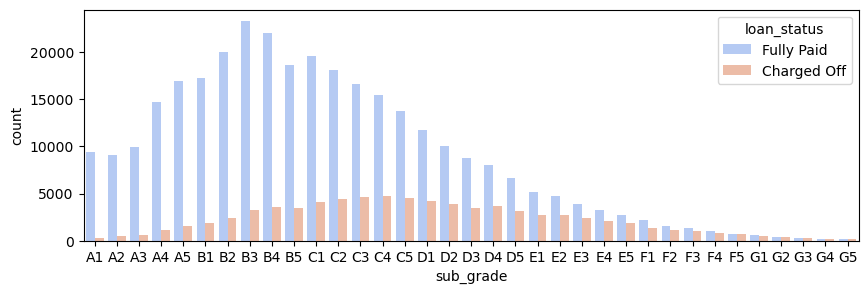

In [755]:
plt.figure(figsize=(10,3))
sns.countplot(x='sub_grade', hue='loan_status', data=df, palette='coolwarm', order=sorted(df['sub_grade'].unique()))

# The worst grade categories, it looks like the Charge Off rate is almost the same as the Fully Paid rate.
#  It looks like F and G subgrades don't get paid back that often.

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

In [756]:
df_FG = df[(df['grade'] =='F') | (df['grade']== 'G')]

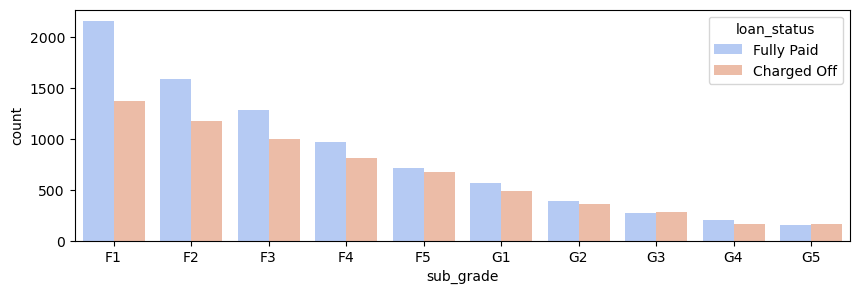

In [757]:
plt.figure(figsize=(10,3))
sns.countplot(x='sub_grade', hue='loan_status', data=df_FG, palette='coolwarm', order=sorted(df_FG['sub_grade'].unique()))
plt.show()

# We can see the Fully Paid status versus Charge Off status for these worse sub grades.
# If you're great at G5, the likelihood is almost the same as Fully Paid off your loan versus being charged off on the loan.

**TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [758]:
df['loan_repaid'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)
# df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0}) # another way for the same

In [759]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [760]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

<AxesSubplot: >

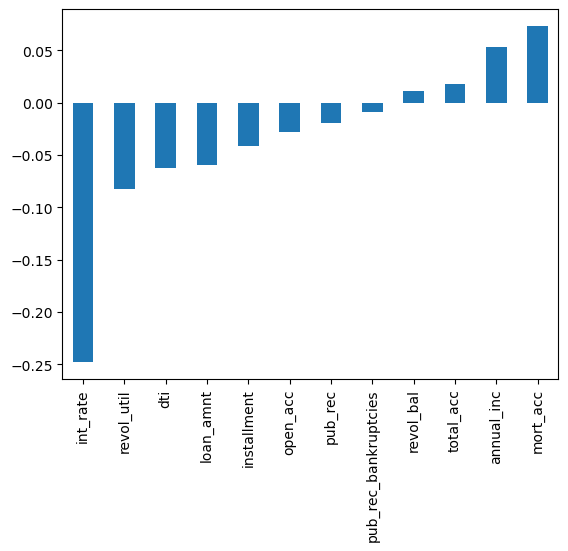

In [761]:
df.corr()['loan_repaid'][:-1].sort_values().plot(kind='bar') 
# loan repaid is perfectly correlated for loan repayment repaid. 
# So we will go ahead and drop it using drop('loan_repaid') or [:-1]

# The plot shows interest rate has essentially the highest negative correlation with whether or not someone's going 
# to repay their loan. Makes sense, because if you have an extremely high interest rate, 
# you're going to find it harder to pay off that loan. 

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [762]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

In [763]:
len(df)

396030

**TASK: Create a Series that displays the total count of missing values per column.**

In [764]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [765]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [766]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**TASK: How many unique employment job titles are there?**

In [767]:
df['emp_title'].nunique()

173105

In [768]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

**TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [769]:
df = df.drop('emp_title', axis=1)

In [770]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [771]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [772]:
def sort_emp_length(x):
    if x == '10+ years':
        return 11
    elif x == '< 1 year':
        return 0
    elif x == 'nan':
        x.dropna()
    else:
        return int(x.split()[0])

In [773]:
sorted(df['emp_length'].dropna().unique(), key=sort_emp_length)

['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

In [774]:
emp_length_order = sorted(df['emp_length'].dropna().unique(), key=sort_emp_length)

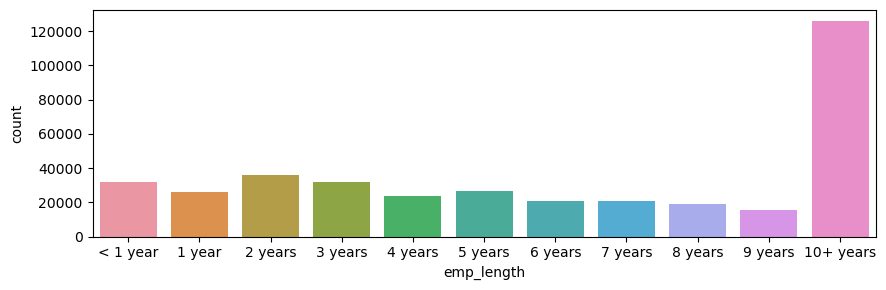

In [775]:
plt.figure(figsize=(9,3))
sns.countplot(x='emp_length', data=df, order=emp_length_order)
plt.tight_layout()

# the majority of people have been working in their employment for ten plus years. 
# Makes sense if you're taking a loan, you're very likely to have a job.

**TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

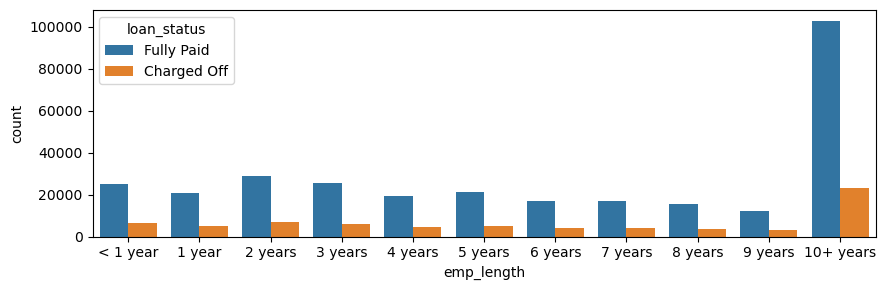

In [776]:
plt.figure(figsize=(9,3))
sns.countplot(x='emp_length', data=df, hue='loan_status', order=emp_length_order)
plt.tight_layout()

# We are interested in the relationship between Fully Paid off versus Charged Off per employment length.
# If the ratio of this blue bar to this orange bar is essentially the same across all these employment
# length categories, then this isn't a very informative feature.




In [777]:
# What we want to do is to figure out the ratio between the Fully Paid off versus Charged Off 
# people per category of employment link. The percentage of Charge Off per employment length category:

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

In [778]:
emp_co = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']

In [779]:
emp_fp = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']

In [780]:
emp_co/emp_fp

# we can also calculate the percent per category instead of the ratio using this:
# emp_co/(emp_co+emp_fp)

# In the percentatge looks like regardless of what actual employment length you have, if you were to pick someone
# about 20% of them, somewhere between 19% and 20%, are going to have not paid back their loans.

# In the ratio we can see here that across the extremes it looks to be extremely similar.
# This feature of employment length doesn't have some extreme differences on the Charge Off rates.



emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

In [781]:
emp_plot = emp_co/emp_fp

<AxesSubplot: xlabel='emp_length'>

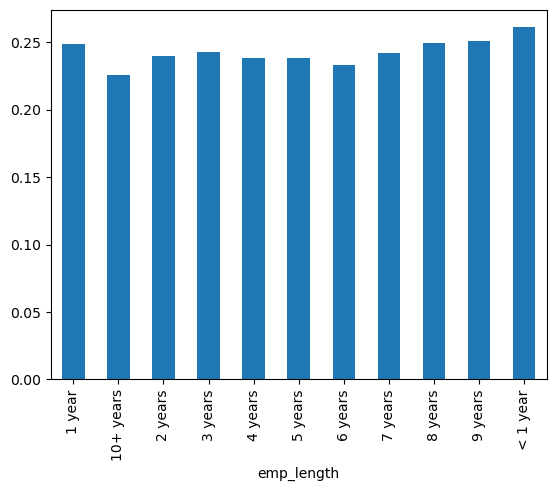

In [782]:
emp_plot.plot(kind='bar')

# Regarding the next bars are almost the same height, there really isn't that much information or differentiation between 
# the employment length columns (surprisingly).

# But we can see here the main difference is that people who work for ten years are have a slightly smaller Charge Off rate 
# than people who worked less like one year or less than a year.

# But the difference is not extreme enough to really validate keeping this feature.

**TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [783]:
df = df.drop('emp_length', axis=1)

In [784]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [785]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Review the title column vs the purpose column. Is this repeated information?**

In [786]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [787]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [788]:
pd.set_option('display.max_columns', 500)
df.head()

# Yes, is repeated information in the title column and the purpose column

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


**TASK: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

In [789]:
df = df.drop('title', axis=1)

In [790]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

---
**NOTE: This is one of the hardest parts of the project! Refer to the solutions video if you need guidance, feel free to fill or drop the missing values of the mort_acc however you see fit! Here we're going with a very specific approach.**


---
**TASK: Find out what the mort_acc feature represents**

In [791]:
# We cannot drop the 'mort_acc', otherwise we'd be dropping 10% of our data.
# Another option is drop the actual feature itself. It's not unreasonable to drop it.
# But you're also not missing that much of the data. You're only missing 10%

# Figure out, is there a way we can fill in this data.

# So one approach is to try to figure out which of these other features that we have all the information for correlates 
# highly with this mortgage accounts and see if we can use that to fill in our information off of it.
# So, we're going to review which columns are most highly correlated to our mortgage accounts column.

feat_info('mort_acc')

Number of mortgage accounts.


**TASK: Create a value_counts of the mort_acc column.**

In [792]:
df['mort_acc'].value_counts()

# looks like the majority of people have zero other mortgage accounts and it looks like that's almost 25% of our data.

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

In [793]:
# We want to check what is a correlation with the mortgage account column for all our current numerical columns

df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**TASK: *Looks like the total_acc feature correlates with the mort_acc*, this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [794]:
# We're going to group the dataframe by total accounts and calculate the
# mean value for the mortgage accounts per total account entry:

print('Mean of mort_acc column per total_acc')
df.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [795]:
# So here can see that the average mortgage accounts, if you only have two total accounts, is going to be zero.
# So it makes sense that if I have a row where I'm missing the mortgage account information, I will use this series 
# as a lookup and replace that missing mortgage account value based off the total account value that I know is not 
# missing and fill it in with the average value there.

**CHALLENGE TASK: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. Check out the link below for more info, or review the solutions video/notebook.**

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

In [796]:
mean_acc = df.groupby('total_acc').mean()['mort_acc']

In [797]:
mean_acc

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [798]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return mean_acc[total_acc] #lookup call
    else:
        return mort_acc

In [799]:
# The mean_acc[total_acc] is a look-up call. The mean_acc object is a Pandas Series object that has been grouped by 
# the total_acc column in the original DataFrame df. The resulting Series object has the mean of the mort_acc column 
# for each unique value of total_acc as the values, and the unique values of total_acc as the index. 
# The total_acc argument in the function fill_mort_acc is being used as the index for the look-up call, 
# to retrieve the corresponding mean value of mort_acc for that particular total_acc.

In [800]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [801]:
# What we did in the last steps to figure out a way to fill in the missing values of this mortgage account column is the next:
# 10% of people were missing it. So we can't just drop those rows. And it looks like it may be important enough 
# to actually keep in as a feature.
# So if we decide not to drop that column and not to drop that rows, we have to fill in the data.

# 1 - We figured out what actual other features are highly correlated with mortgage accounts. 
# It looks like total accounts is pretty well correlated.

# 2 - We group by total accounts and figure out what's the average mortgage account value for the different 
# groupings of the total account for each total account category.

# 3 - We use that as our lookup. We're missing the mortgage account value, so look up the average value for that 
# mortgage account based off their total account. If it's not missing, just return back the current value.

In [802]:
# Finally we can confirm that it's been filled:

df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [803]:
df=df.dropna()

In [804]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [805]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  

In [806]:
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [807]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [808]:
df['term'] = df['term'].apply(lambda x: int(x[:3]))

In [809]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

In [810]:
df = df.drop('grade', axis=1)

In [811]:
df.select_dtypes(include='object').columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [812]:
df = pd.get_dummies(df, columns=['sub_grade'],drop_first=True) 
# the drop_first=True eventually will stop us from encoding duplicate information

# You can imagine in the case, if we had some sort of a gender or sex column where it was male or female, we don't need to 
# encode both of them to be zeros and ones. Instead, that would just get converted to whether or not they're male zero or one.
# Otherwise, you're duplicating the information. And that's the same thing if you start expanding it to more categories.
# So if you have ABC as your categories, so if you have ABC, you don't need to encode that to zero, one, zero or something 
# like that. You just need the A and B columns because if it's not A and if it's not B, then it's implied that it's going to be C.
# So that's why we have drop first is equal to true there.


In [813]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4',
       'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3',
       'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2',
       'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1',
       'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',
       'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4',
       'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3',
       'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2',
       'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5'],
      dtype='object')

In [814]:
df.columns=df.columns.str.replace('sub_grade_', '')

In [815]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [816]:
df.select_dtypes(include='object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [817]:
# if you take a look at these other columns, they're also good candidates for being converted into dummy variables because 
# there's not a whole lot of categories and they're pretty much also for the most of these just binary or just a few categories.

In [818]:
df = pd.get_dummies(df, columns=['verification_status', 'application_type','initial_list_status','purpose'],drop_first=True)

In [819]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

In [820]:
df.columns=df.columns.str.replace('verification_status_', '')
df.columns=df.columns.str.replace('application_type_', '')
df.columns=df.columns.str.replace('initial_list_status_', '')
df.columns=df.columns.str.replace('purpose_', '')
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified',
       'Verified', 'INDIVIDUAL', 'JOINT', 'w', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding'],
      dtype='object')

### home_ownership
**TASK:Review the value_counts for the home_ownership column.**

In [821]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**TASK: Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [822]:
df['home_ownership'].replace({'NONE': 'OTHER', 'ANY': 'OTHER'}, inplace=True)
# df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')  # this is the same

In [823]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [824]:
df = pd.get_dummies(df, columns=['home_ownership'], drop_first=True)

In [825]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified',
       'INDIVIDUAL', 'JOINT', 'w', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT'],
      dtype='object')

In [826]:
df.columns=df.columns.str.replace('home_ownership_', '')
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified',
       'INDIVIDUAL', 'JOINT', 'w', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding', 'OTHER', 'OWN', 'RENT'],
      dtype='object')

### address
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [827]:
df['zipcode']=df['address'].str[-5:]

In [828]:
df['zipcode']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zipcode, Length: 395219, dtype: object

In [829]:
# we can check there are not so many categories in zipcode, just 10

df['zipcode'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zipcode, dtype: int64

**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [830]:
df = pd.get_dummies(df, columns=['zipcode'], drop_first=True)

In [831]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified',
       'INDIVIDUAL', 'JOINT', 'w', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding', 'OTHER', 'OWN', 'RENT', 'zipcode_05113', 'zipcode_11650',
       'zipcode_22690', 'zipcode_29597', 'zipcode_30723', 'zipcode_48052',
       'zipcode_70466', 'zipcode_86630', 'zipcode_93700'],
      dtype='object')

In [832]:
df.columns=df.columns.str.replace('zipcode_', '')
df=df.drop('address', axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified',
       'INDIVIDUAL', 'JOINT', 'w', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding', 'OTHER', 'OWN', 'RENT', '05113', '11650', '22690', '29597',
       '30723', '48052', '70466', '86630', '93700'],
      dtype='object')

### issue_d 

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [833]:
# This feature information indicates the month which the loan was funded.
feat_info('issue_d')

The month which the loan was funded


In [834]:
# If we actually think about the problem we're trying to solve here is we're trying to specify, based off someone's 
# already known features, whether or not they're going to pay back a loan, which ideally that's going to happen before 
# we actually issue them alone. Because if we think they're not going to actually pay back the loan, we won't issue one 
# in the first place. So we in reality won't have an issue date for when we're actually running the model. 
# It's not like we're always going to know that we issued them alone. 
# Otherwise that kind of defeats the whole purpose of the model.

# So this is actually data leakage since realistically speaking, upon application of the model, you won't have an issue date.
# So just drop this column:

df=df.drop('issue_d', axis=1)

In [835]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified',
       'INDIVIDUAL', 'JOINT', 'w', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding', 'OTHER', 'OWN', 'RENT', '05113', '11650', '22690', '29597',
       '30723', '48052', '70466', '86630', '93700'],
      dtype='object')

### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [836]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [837]:
df['earliest_cr_year']=df['earliest_cr_line'].str[-4:]

In [838]:
df['earliest_cr_year']= df['earliest_cr_year'].astype(int)

In [839]:
df=df.drop('earliest_cr_line', axis=1)

In [840]:
df['earliest_cr_year'].value_counts() 

#  we don't need to convert this to dummy variables because the year itself can be treated as a continuous data type.

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: earliest_cr_year, Length: 65, dtype: int64

In [841]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified',
       'Verified', 'INDIVIDUAL', 'JOINT', 'w', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'OTHER', 'OWN', 'RENT',
       '05113', '11650', '22690', '29597', '30723', '48052', '70466', '86630',
       '93700', 'earliest_cr_year'],
      dtype='object')

## Train Test Split

**TASK: Import train_test_split from sklearn.**

In [842]:
from sklearn.model_selection import train_test_split

**TASK: drop the loan_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [843]:
df[['loan_status', 'loan_repaid']]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


In [844]:
df=df.drop('loan_status', axis=1)

**TASK: Set X and y variables to the .values of the features and label.**

In [845]:
X = df.drop('loan_repaid', axis=1).values

In [846]:
y = df['loan_repaid'].values

----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [847]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

395219


**TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [848]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

**TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [849]:
from sklearn.preprocessing import MinMaxScaler

In [850]:
scaler = MinMaxScaler()

In [851]:
X_train = scaler.fit_transform(X_train)

In [852]:
X_test = scaler.transform(X_test) 

# we don't want to fit to that. We just want to transform to prevent any data leakage from our test set.

# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [853]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [854]:
X_train.shape

(316175, 78)

In [865]:
# CODE HERE
model = Sequential()

# Choose whatever number of layers/neurons you want.
model.add(Dense(78,activation='relu'))  # X_train shape, it starts off with 78 features. So my first layer will match that. 
model.add(Dropout(0.5)) # Randomly 0.2 or 0.5.. playing around I see 0.5 performs a better model
model.add(Dense(39,activation='relu')) # Reduce about the half of 78.
model.add(Dropout(0.5)) # Same Dropout than the first Dropout
model.add(Dense(19,activation='relu')) # Reduce about the half of 39.
model.add(Dropout(0.5)) # Same Dropout than the first Dropout

model.add(Dense(1,activation='sigmoid')) #output layer

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# Remember to compile()
model.compile(loss='binary_crossentropy',optimizer='adam')

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [866]:
model.fit(x=X_train, y=y_train, epochs=25, validation_data=(X_test, y_test), batch_size=256) 

# We could pass also an Earlystopping

Epoch 1/25
1236/1236 [==============================] - 5s 3ms/step - loss: 0.3426 - val_loss: 0.2666
Epoch 2/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2750 - val_loss: 0.2651
Epoch 3/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2702 - val_loss: 0.2658
Epoch 4/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2682 - val_loss: 0.2633
Epoch 5/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2672 - val_loss: 0.2633
Epoch 6/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2666 - val_loss: 0.2626
Epoch 7/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2664 - val_loss: 0.2632
Epoch 8/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2660 - val_loss: 0.2625
Epoch 9/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2661 - val_loss: 0.2626
Epoch 10/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.265

**TASK: OPTIONAL: Save your model.**

In [867]:
from tensorflow.keras.models import load_model

In [868]:
model.save('Project_Exercise_SERGI.h5')

In [869]:
# later_model = load_model('Project_Exercise_SERGI.h5')

# Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

In [870]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot: >

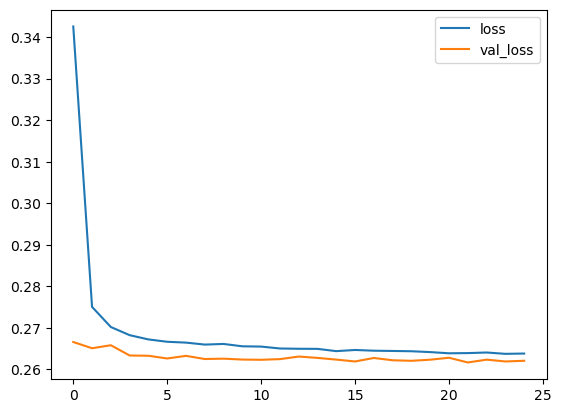

In [871]:
losses.plot()

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [872]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
predictions

2471/2471 [==============================] - 2s 860us/step


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [873]:
from sklearn.metrics import classification_report, confusion_matrix

In [874]:
print(classification_report(y_test,predictions)) # with Dropout and batch

# We're looking at around 90% accuracy. 
# In the countplot from the begining we analyzed the actual label itself and recall that it's an imbalanced label.
# So there are a lot more fully paid than there are charged off loans.
# If we were to take a look at a model that simply recalled back any loan as being Fully Paid, 
# it would actually still be pretty accurate.


              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [900]:
# If we take a look at our original data frame and we have whether or not our loan was repaid or we're going to do is let's 
# do some value counts here. And we have this many loan repaid.

df['loan_repaid'].value_counts()

1    317696
0     77523
Name: loan_repaid, dtype: int64

In [901]:
317696/len(df)

# So let's go ahead and take that and divide it by the actual length of that data frame.
# So notice here that what this is indicating is that 80% of my points were already being predicted as
# loan repaid, which means if I created a very simple model that simply said any loan will be repaid,
# I would be 80% accurate.

0.8038479931379817

In [882]:
# So, regarding the classification_report don't be fooled by a model that returns back 80% accuracy 
# because by default, a model that just always reports back to the loan will be repaid itself will be 80% accurate, 
# more or less on this actual test data set.

# So we should be looking at kind of a bottom threshold of 80%, which means our 89% accuracy here is
# ok, but it's not absolutely fantastic because of our imbalanced data set.

# As mentioned in the machine learning metric lectures, the actual metrics we want to take a look at
# are Precision, Recall and F-1 score, and it looks like depending on the class, you perform a little worse.

# So the true class we should be looking at here is the one that's lower representation, which is 0.
# So note we have a lot less instances of 0 class.

# We're pretty good on the precision here, but really where we suffer is the recall and we can get an
# F-1 score which recalls the harmonic mean between precision and recall.

# So really the true notification of whether or not this model is doing well is this F-1 score on this
# 0 class?

# So what I would encourage you to do is see if you can play around with the model parameters, maybe
# add in more layers, add in more neurons, maybe play around with the dropout rate to see if you can
# improve off of base 0.6 F-1 score.

# Okay, so is this good or bad?
# Well, that really depends on the entire context of the situation, whether we have a model that already
# attempts to predict this and what's its F-1 score.
# So we need a lot more context to decide whether or not this recall and this F-1 score are good enough.

# Well, we can say right is that this accuracy is better than just kind of a default guess
# which would be 80%.

# So this model is definitely better than just kind of a random guess or a straight guess.
# So we are performing much better.

# A random guess would get 50% accuracy.
# A straight guess of always being repaid would get 80% accuracy, and in our model is getting 89% accuracy.

# So we are performing better than both a random guess and a straight loan repaid return.
# Okay, so overall we can see that our model is learning something from this data set. 

In [421]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.47      0.62     15658
           1       0.88      0.99      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.91      0.73      0.78     79044
weighted avg       0.89      0.89      0.87     79044



              precision    recall  f1-score   support

           0       0.99      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [875]:
print(confusion_matrix(y_test,predictions)) # with Dropout and batch

# We can see we're misclassifying a lot of those 0 points which causes this kind of low recall.

[[ 6720  8938]
 [    0 63386]]


In [422]:
print(confusion_matrix(y_test,predictions))

[[ 7306  8352]
 [  562 62824]]


array([[ 6850,  8808],
       [  100, 63286]], dtype=int64)

**TASK: Given the customer below, would you offer this person a loan?**

In [885]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [886]:
new_customer.values

array([2.5000e+04, 6.0000e+01, 1.8240e+01, 6.3811e+02, 6.1665e+04,
       3.0110e+01, 1.6000e+01, 0.0000e+00, 2.7778e+04, 6.5500e+01,
       4.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e

In [887]:
len(new_customer.values)

78

In [888]:
scaler.transform(new_customer.values.reshape(1,78))

array([[0.61538462, 1.        , 0.50331126, 0.40836493, 0.00708257,
        0.0030113 , 0.2       , 0.        , 0.01593446, 0.07340581,
        0.29530201, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.  

In [889]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))

In [891]:
(model.predict(new_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 19ms/step


array([[1]])

**TASK: Now check, did this person actually end up paying back their loan?**

In [894]:
# new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
df.iloc[random_ind] # we just remove the drop() from before

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 79, dtype: float64

In [899]:
df.iloc[random_ind]['loan_repaid'] # In this particular random case this person end up paying back their loan. 
# Remember 1 in 'loan_repaid' was Fully Paid in 'loan_status'. 
# So the (model.predict(new_customer) > 0.5).astype("int32") predicted correctly.

1.0

# GREAT JOB!